In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/complete_final_data.csv')

In [3]:
df['DATE'] = pd.to_datetime(df['DATE']).dt.to_period('M')

In [4]:
df.head()

,DATE,avg_weeks_unemployed,cont_claims_insur_unemploy,full_employ_level,part_employ_level,not_in_labor_force,gov_unemp_insur,labor_particip_women,labor_particip_men,labor_particip_total,...,unemploy_rate,insured_unemploy_rate,target_retail,target_mining_logging,target_construction,target_edu_health,target_manufacturing,target_prof_business,target_gov,target_leisure_hospitality
0,1975-01,10.7,3619250.0,85627.0,4133.0,58627.0,12.0,46.3,78.3,61.4,...,8.1,5.500,8518.9,789,3841,5404,17344,6006,14624,5476
1,1975-02,11.7,3856500.0,85256.0,3994.0,59214.0,14.0,45.9,78.0,61.0,...,8.1,5.875,8528.5,790,3718,5421,17004,6002,14747,5484
2,1975-03,11.8,4175200.0,85187.0,4087.0,59052.0,16.5,46.2,78.0,61.2,...,8.6,6.340,8526.7,793,3628,5430,16853,5999,14754,5488
3,1975-04,12.9,4473500.0,85189.0,4179.0,59044.0,18.8,46.3,78.1,61.3,...,8.8,6.750,8492.9,785,3565,5435,16759,5994,14795,5472
4,1975-05,13.4,4578200.0,85451.0,3972.0,58820.0,19.6,46.4,78.3,61.5,...,9.0,6.880,8538.5,799,3552,5468,16746,6022,14827,5502


In [5]:
df.columns

Index(['DATE', 'avg_weeks_unemployed', 'cont_claims_insur_unemploy',
       'full_employ_level', 'part_employ_level', 'not_in_labor_force',
       'gov_unemp_insur', 'labor_particip_women', 'labor_particip_men',
       'labor_particip_total', 'real_estate_loans', 'consumer_loans',
       'commerc_indust_loans', 'm1_real', 'unemp_less_five_weeks',
       'unemp_5_to_14_wks', 'unemp_15_to_26_wks', 'unemp_over_27_wks',
       'personal_consum_exp', 'personal_save_rate', 'emp_pop_ratio',
       'unemploy_rate', 'insured_unemploy_rate', 'target_retail',
       'target_mining_logging', 'target_construction', 'target_edu_health',
       'target_manufacturing', 'target_prof_business', 'target_gov',
       'target_leisure_hospitality'],
      dtype='object')

In [6]:
#df.to_csv('date_modified_data.csv', index = False, date_format='%Y-%m')

In [7]:
df.set_index('DATE', inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 554 entries, 1975-01 to 2021-02
Freq: M
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   avg_weeks_unemployed        554 non-null    float64
 1   cont_claims_insur_unemploy  554 non-null    float64
 2   full_employ_level           554 non-null    float64
 3   part_employ_level           554 non-null    float64
 4   not_in_labor_force          554 non-null    float64
 5   gov_unemp_insur             554 non-null    float64
 6   labor_particip_women        554 non-null    float64
 7   labor_particip_men          554 non-null    float64
 8   labor_particip_total        554 non-null    float64
 9   real_estate_loans           554 non-null    float64
 10  consumer_loans              554 non-null    float64
 11  commerc_indust_loans        554 non-null    float64
 12  m1_real                     554 non-null    float64
 13  unemp_less_five_

In [9]:
df.index

PeriodIndex(['1975-01', '1975-02', '1975-03', '1975-04', '1975-05', '1975-06',
             '1975-07', '1975-08', '1975-09', '1975-10',
             ...
             '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10',
             '2020-11', '2020-12', '2021-01', '2021-02'],
            dtype='period[M]', name='DATE', length=554, freq='M')

In [10]:
#Check for abnormalities in the numeric data for columns (0:10)
df.describe().iloc[:,0:10]

,avg_weeks_unemployed,cont_claims_insur_unemploy,full_employ_level,part_employ_level,not_in_labor_force,gov_unemp_insur,labor_particip_women,labor_particip_men,labor_particip_total,real_estate_loans
count,554.000000,5.540000e+02,554.000000,554.00000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000
mean,19.069856,3.011788e+06,126253.104693,5302.83574,73041.657040,47.242960,56.458303,74.011913,64.847473,1865.446729
std,7.417065,1.704694e+06,19922.136883,1561.05041,12452.074104,113.140409,3.533351,2.973780,1.745654,1515.873685
min,6.100000,1.657500e+06,85187.000000,3144.00000,58627.000000,8.300000,45.900000,66.200000,60.200000,130.025700
25%,14.100000,2.297325e+06,109861.250000,4219.25000,62782.250000,17.100000,55.325000,72.000000,63.325000,458.666450
50%,16.850000,2.634250e+06,130766.500000,4876.50000,67215.500000,27.100000,57.450000,74.900000,65.350000,1231.012050
75%,20.500000,3.304462e+06,142425.750000,6150.25000,81676.750000,35.475000,59.200000,76.300000,66.400000,3538.589550
max,40.700000,2.203500e+07,158735.000000,10899.00000,103418.000000,1404.900000,60.300000,78.300000,67.300000,4685.977600


In [11]:
#Check for abnormalities in the numeric data for columns (10:20)
df.describe().iloc[:,10:20]

,consumer_loans,commerc_indust_loans,m1_real,unemp_less_five_weeks,unemp_5_to_14_wks,unemp_15_to_26_wks,unemp_over_27_wks,personal_consum_exp,personal_save_rate,emp_pop_ratio
count,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000
mean,621.249853,970.699963,794.749097,2900.344765,2459.729242,1241.323105,1806.880866,6601.645668,7.989711,60.754152
std,423.441909,631.164166,428.576444,645.656531,823.679562,576.233090,1389.174665,4134.499662,2.965044,2.274895
min,101.102000,177.475500,458.600000,1846.000000,1614.000000,594.000000,470.000000,975.600000,2.200000,51.300000
25%,305.460225,513.524575,612.600000,2572.000000,2066.250000,914.000000,1036.500000,2885.550000,6.300000,58.900000
50%,495.977550,858.964950,665.800000,2800.000000,2356.500000,1098.000000,1334.500000,5707.950000,7.500000,60.800000
75%,861.579375,1292.206575,774.850000,3220.250000,2631.000000,1389.750000,1926.500000,10001.075000,9.700000,62.700000
max,1604.612600,3040.007000,6996.500000,14282.000000,14804.000000,6536.000000,6800.000000,14939.100000,33.700000,64.700000


In [12]:
#Check for abnormalities in the numeric data for columns (20:30)
df.describe().iloc[:,20:31]

,unemploy_rate,insured_unemploy_rate,target_retail,target_mining_logging,target_construction,target_edu_health,target_manufacturing,target_prof_business,target_gov,target_leisure_hospitality
count,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000
mean,6.330686,2.789278,13462.213718,768.752708,5689.171480,14476.222022,15665.722022,13748.254513,19528.651625,10862.415162
std,1.723982,1.371141,2126.333846,154.730210,1173.298564,5743.851263,2474.577429,4707.030115,2584.996859,3137.371904
min,3.500000,1.200000,8492.900000,566.000000,3501.000000,5404.000000,11414.000000,5994.000000,14624.000000,5472.000000
25%,5.000000,2.000000,12118.775000,652.250000,4692.000000,9123.250000,12818.500000,9254.250000,16792.500000,8149.000000
50%,6.000000,2.560000,14399.050000,739.000000,5555.000000,14404.000000,16858.500000,14878.000000,19778.000000,11080.500000
75%,7.400000,3.125000,15202.475000,851.000000,6767.500000,19668.000000,17605.000000,17629.250000,21924.250000,13240.750000
max,14.800000,15.120000,15920.000000,1257.000000,7726.000000,24565.000000,19553.000000,21469.000000,22996.000000,16915.000000


In [13]:
# Column 'Continued Claims (Insured Unemployment)' looks like, it is exponential count
df['cont_claims_insur_unemploy'].describe()

count    5.540000e+02
mean     3.011788e+06
std      1.704694e+06
min      1.657500e+06
25%      2.297325e+06
50%      2.634250e+06
75%      3.304462e+06
max      2.203500e+07
Name: cont_claims_insur_unemploy, dtype: float64

In [14]:
# for column 'Continued Claims (Insured Unemployment)' will take the log
np.log(df['cont_claims_insur_unemploy']).describe()

count    554.000000
mean      14.849765
std        0.319042
min       14.320821
25%       14.647255
50%       14.784109
75%       15.010784
max       16.908143
Name: cont_claims_insur_unemploy, dtype: float64

In [15]:
#Check for correlation in the data
corr = df.corr()

In [16]:
# Heat to visualize correlation in the data
corr.style.background_gradient(cmap='coolwarm')

,avg_weeks_unemployed,cont_claims_insur_unemploy,full_employ_level,part_employ_level,not_in_labor_force,gov_unemp_insur,labor_particip_women,labor_particip_men,labor_particip_total,real_estate_loans,consumer_loans,commerc_indust_loans,m1_real,unemp_less_five_weeks,unemp_5_to_14_wks,unemp_15_to_26_wks,unemp_over_27_wks,personal_consum_exp,personal_save_rate,emp_pop_ratio,unemploy_rate,insured_unemploy_rate,target_retail,target_mining_logging,target_construction,target_edu_health,target_manufacturing,target_prof_business,target_gov,target_leisure_hospitality
avg_weeks_unemployed,1.000000,0.058053,0.547407,0.708111,0.722874,0.147684,0.233953,-0.748945,-0.337470,0.678989,0.687108,0.547218,0.437384,-0.325617,0.147444,0.508719,0.880490,0.667828,-0.182136,-0.364874,0.238724,-0.147073,0.458580,-0.036584,0.240115,0.663174,-0.812906,0.580501,0.575463,0.621815
cont_claims_insur_unemploy,0.058053,1.000000,0.019062,0.470027,0.207856,0.880186,-0.055904,-0.219846,-0.234446,0.203001,0.170938,0.241284,0.236038,0.397336,0.857133,0.625833,0.258894,0.144755,0.484106,-0.454421,0.599947,0.858958,-0.034944,-0.060537,0.008115,0.120352,-0.259285,0.071720,0.089499,-0.034796
full_employ_level,0.547407,0.019062,1.000000,0.275998,0.869852,0.209783,0.781028,-0.881714,0.151683,0.909592,0.888823,0.881537,0.577181,-0.438188,0.011722,0.199995,0.344431,0.946593,-0.570085,0.322434,-0.443312,-0.451555,0.974828,-0.593735,0.914472,0.975039,-0.818867,0.989071,0.980230,0.985323
part_employ_level,0.708111,0.470027,0.275998,1.000000,0.464212,0.411196,0.174642,-0.507044,-0.211182,0.448229,0.432425,0.362174,0.283764,0.224680,0.586042,0.686174,0.816448,0.390085,0.144632,-0.469178,0.642185,0.276358,0.212142,0.116715,-0.023426,0.393185,-0.609209,0.277364,0.331387,0.295479
not_in_labor_force,0.722874,0.207856,0.869852,0.464212,1.000000,0.375869,0.408362,-0.991040,-0.340304,0.972013,0.987763,0.962143,0.748519,-0.352765,0.169925,0.357916,0.507679,0.979249,-0.202991,-0.169992,-0.159803,-0.174936,0.755085,-0.320502,0.721933,0.950841,-0.934939,0.911161,0.844063,0.908328
gov_unemp_insur,0.147684,0.880186,0.209783,0.411196,0.375869,1.000000,0.067172,-0.390050,-0.236151,0.353236,0.358462,0.428035,0.480227,0.114448,0.766809,0.512278,0.245173,0.327553,0.377621,-0.338931,0.357822,0.648912,0.154590,-0.178670,0.197387,0.295480,-0.346351,0.258294,0.230863,0.158528
labor_particip_women,0.233953,-0.055904,0.781028,0.174642,0.408362,0.067172,1.000000,-0.470018,0.714987,0.498123,0.456961,0.466749,0.190050,-0.242418,-0.000724,0.095325,0.178753,0.557391,-0.711868,0.718886,-0.422563,-0.501798,0.883652,-0.678038,0.729690,0.654841,-0.417884,0.705694,0.787077,0.695635
labor_particip_men,-0.748945,-0.219846,-0.881714,-0.507044,-0.991040,-0.390050,-0.470018,1.000000,0.280739,-0.957054,-0.982484,-0.953515,-0.746446,0.336479,-0.194270,-0.380562,-0.541118,-0.974105,0.218087,0.137448,0.138591,0.183509,-0.784157,0.353514,-0.709129,-0.957316,0.930964,-0.917479,-0.856686,-0.913614
labor_particip_total,-0.337470,-0.234446,0.151683,-0.211182,-0.340304,-0.236151,0.714987,0.280739,1.000000,-0.214462,-0.281021,-0.247889,-0.385706,0.001894,-0.154300,-0.196013,-0.231801,-0.164482,-0.603110,0.889996,-0.348632,-0.399496,0.340125,-0.459370,0.232798,-0.045145,0.280498,0.041464,0.179140,0.033601
real_estate_loans,0.678989,0.203001,0.909592,0.448229,0.972013,0.353236,0.498123,-0.957054,-0.214462,1.000000,0.964441,0.940740,0.670900,-0.368422,0.168095,0.375434,0.514462,0.985059,-0.324746,-0.067027,-0.185276,-0.199115,0.803873,-0.391738,0.793715,0.968843,-0.952595,0.936076,0.907427,0.931727


It's hard to visualize the whole data set. So break the data in 10-10 columns and then create the heat maps.

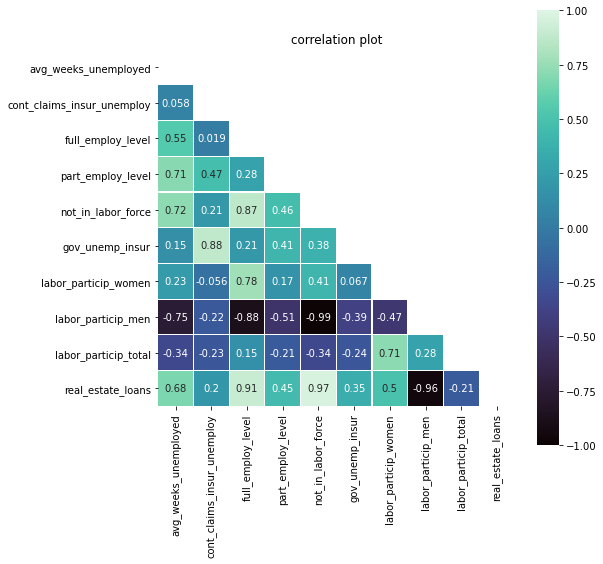

In [17]:
# correlation heatmap for 10 columns
corr = df.corr().iloc[0:10,0:10]
plt.figure(figsize = (8,8))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, cmap = 'mako', annot = True, square = True,
            vmin = -1, vmax = 1, mask = mask, linecolor = 'w', linewidths = 0.1)
plt.title('correlation plot');

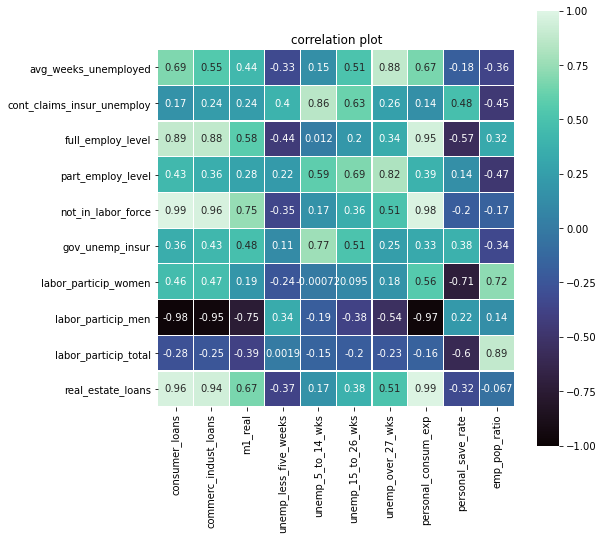

In [18]:
corr = df.corr().iloc[0:10,10:20]
plt.figure(figsize = (8,8))
#mask = np.zeros_like(corr)
#mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, cmap = 'mako', annot = True, square = True,vmin = -1, vmax = 1, 
             linecolor = 'w', linewidths = 0.1)
plt.title('correlation plot');

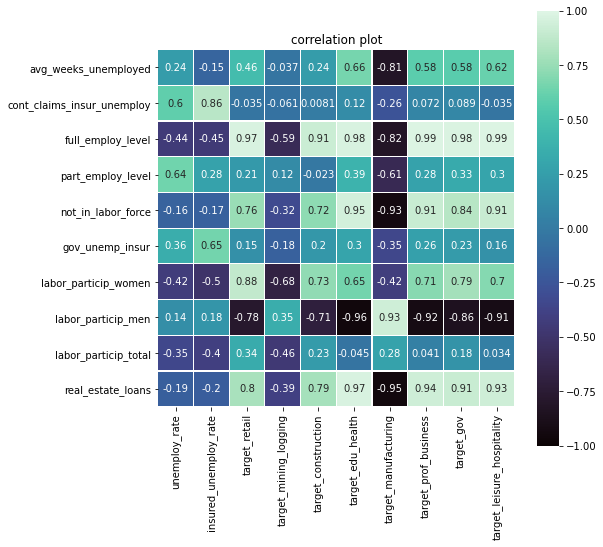

In [19]:
corr = df.corr().iloc[0:10,20:31]
plt.figure(figsize = (8,8))
#mask = np.zeros_like(corr)
#mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, cmap = 'mako', annot = True, square = True,
            vmin = -1, vmax = 1, linecolor = 'w', linewidths = 0.1)
plt.title('correlation plot');

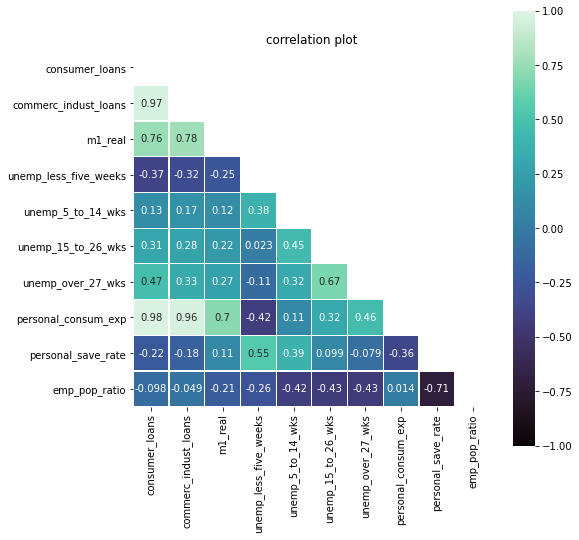

In [20]:
corr = df.corr().iloc[10:20,10:20]
plt.figure(figsize = (8,8))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, cmap = 'mako', annot = True, square = True,
            vmin = -1, vmax = 1, mask = mask, linecolor = 'w', linewidths = 0.1)
plt.title('correlation plot');

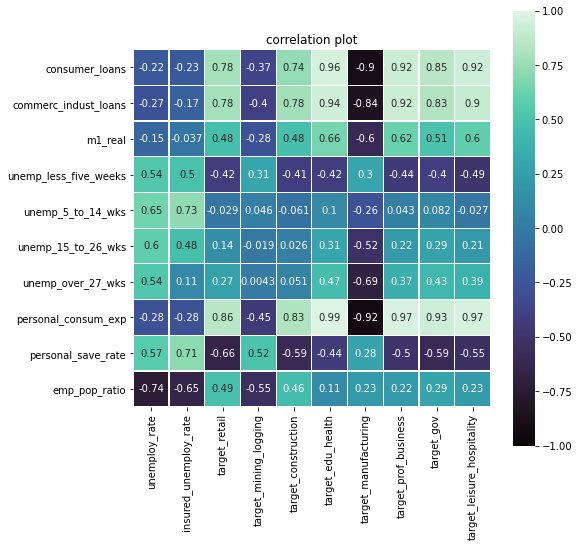

In [21]:
corr = df.corr().iloc[10:20,20:31]
plt.figure(figsize = (8,8))
#mask = np.zeros_like(corr)
#mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, cmap = 'mako', annot = True, square = True,
            vmin = -1, vmax = 1, linecolor = 'w', linewidths = 0.1)
plt.title('correlation plot');

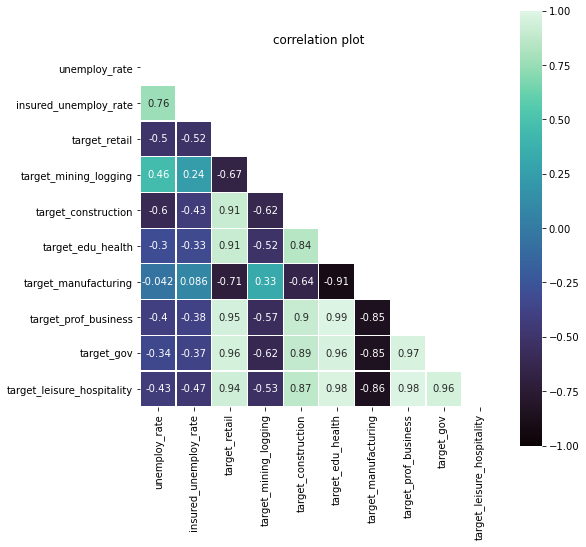

In [22]:
corr = df.corr().iloc[20:31,20:31]
plt.figure(figsize = (8,8))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, cmap = 'mako', annot = True, square = True,
            vmin = -1, vmax = 1, mask = mask, linecolor = 'w', linewidths = 0.1)
plt.title('correlation plot');

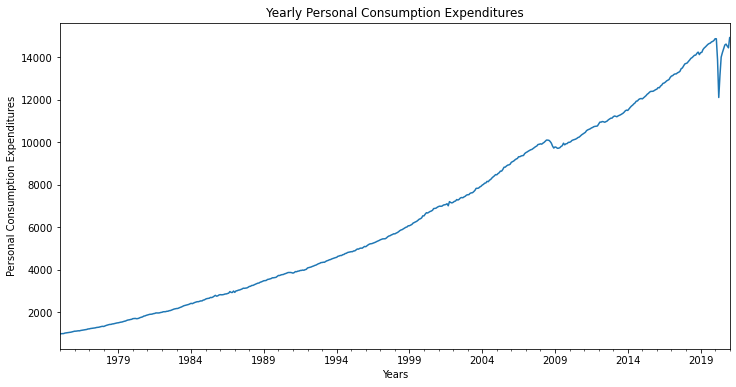

In [23]:
fig = plt.figure(figsize=(12, 6))
df['personal_consum_exp'].plot()
plt.xlim(['1975', '2021'])
plt.xlabel('Years')
plt.ylabel('Personal Consumption Expenditures')
plt.title('Yearly Personal Consumption Expenditures')
plt.show;

IT shows a big drop around 25% in year 2020 but it is back now in 2021.

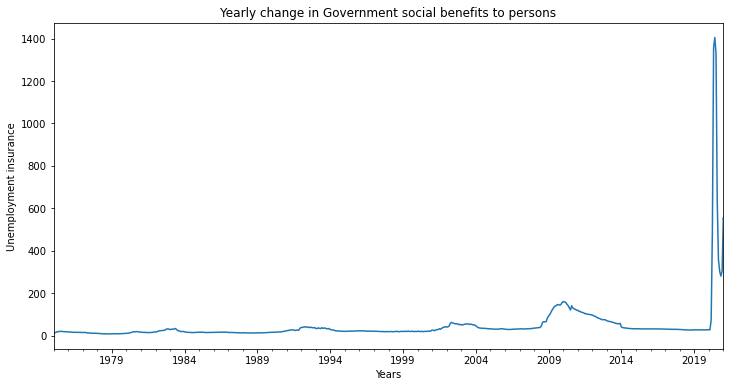

In [24]:
#Yearly change in Government social benefits to persons: Unemployment insurance
fig = plt.figure(figsize=(12, 6))
df['gov_unemp_insur'].plot()
plt.xlim(['1975', '2021'])
plt.xlabel('Years')
plt.ylabel('Unemployment insurance')
plt.title('Yearly change in Government social benefits to persons')
plt.show;

In 2020 govt gave social benefits to persons aka Unemployment insurance of $1400 billion 

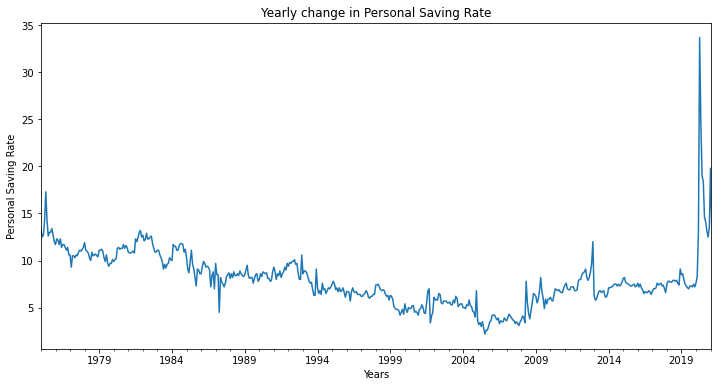

In [25]:
#Yearly change in Personal Saving Rate
fig = plt.figure(figsize=(12, 6))
df['personal_save_rate'].plot()
plt.xlim(['1975', '2021'])
plt.xlabel('Years')
plt.ylabel('Personal Saving Rate')
plt.title('Yearly change in Personal Saving Rate')
plt.show;

Personal savings went all time high around 34% in year 2020.

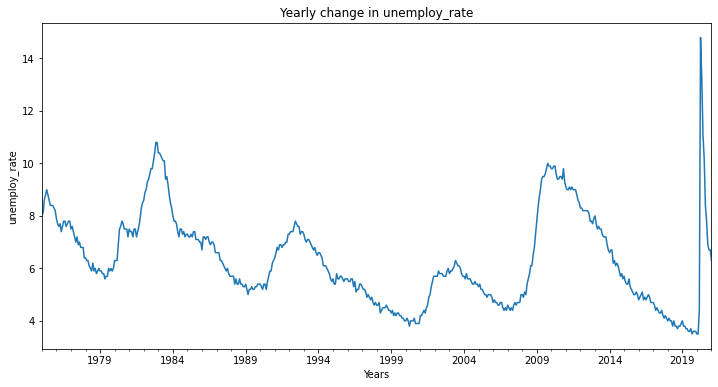

In [26]:
#Yearly change in unemploy rate
fig = plt.figure(figsize=(12, 6))
df['unemploy_rate'].plot()
plt.xlim(['1975', '2021'])
plt.xlabel('Years')
plt.ylabel('unemploy_rate')
plt.title('Yearly change in unemploy_rate')
plt.show;

At the same time unemployment rate went all time around 15% in 2020 but came down to around 6% in 2021.

#### Exploratery Plots for Target variables

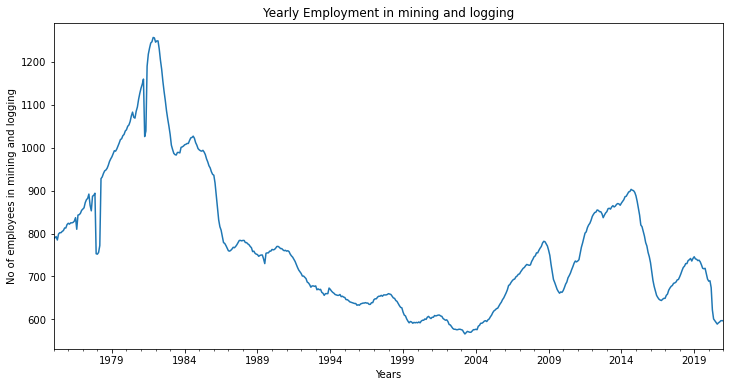

In [27]:
# Yearly Employment in mining and logging
fig = plt.figure(figsize=(12, 6))
df['target_mining_logging'].plot()
plt.xlim(['1975', '2021'])
plt.xlabel('Years')
plt.ylabel('No of employees in mining and logging')
plt.title('Yearly Employment in mining and logging')
plt.show;

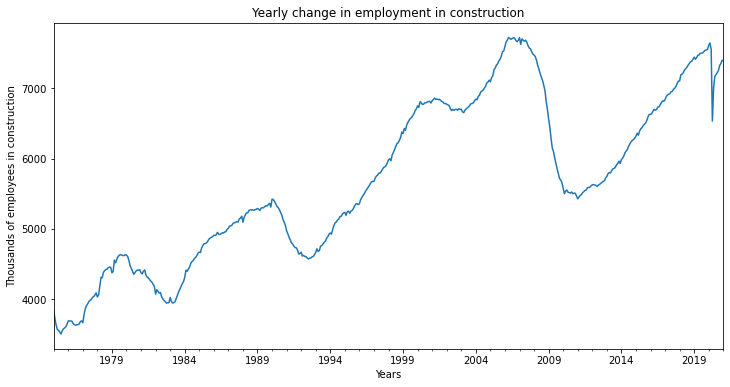

In [28]:
#Yearly change in unemploy rate
fig = plt.figure(figsize=(12, 6))
df['target_construction'].plot()
plt.xlim(['1975', '2021'])
plt.xlabel('Years')
plt.ylabel('Thousands of employees in construction')
plt.title('Yearly change in employment in construction')
plt.show;

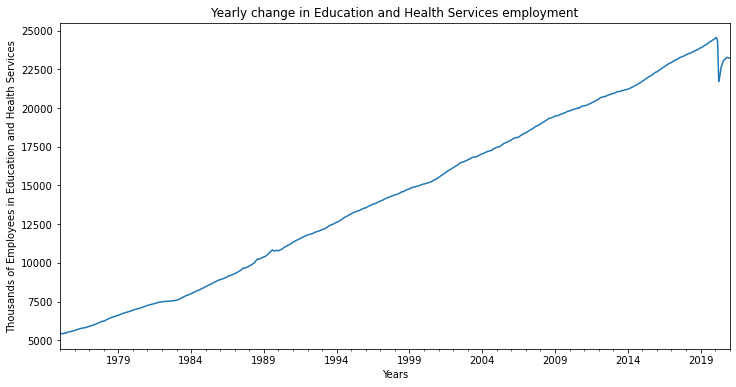

In [29]:
#Yearly change in All Employees in Education and Health Services
fig = plt.figure(figsize=(12, 6))
df['target_edu_health'].plot()
plt.xlim(['1975', '2021'])
plt.xlabel('Years')
plt.ylabel('Thousands of Employees in Education and Health Services')
plt.title('Yearly change in Education and Health Services employment')
plt.show;

Around 15% drop in 2020 in Education and Health Services employment. It's comimng up but still the drop rate is very high.

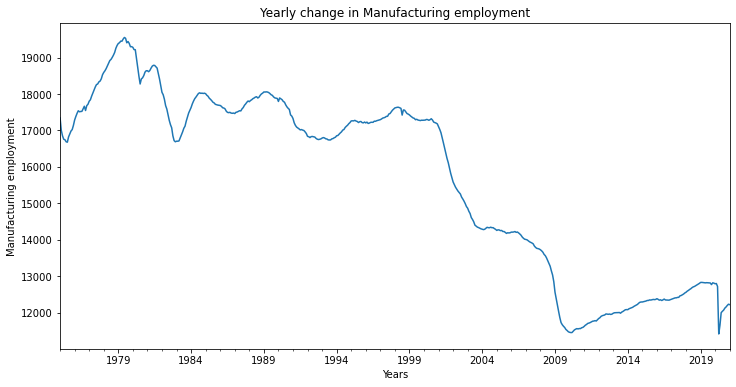

In [30]:
#Yearly change in Manufacturing employment
fig = plt.figure(figsize=(12, 6))
df['target_manufacturing'].plot()
plt.xlim(['1975', '2021'])
plt.xlabel('Years')
plt.ylabel('Manufacturing employment')
plt.title('Yearly change in Manufacturing employment')
plt.show;

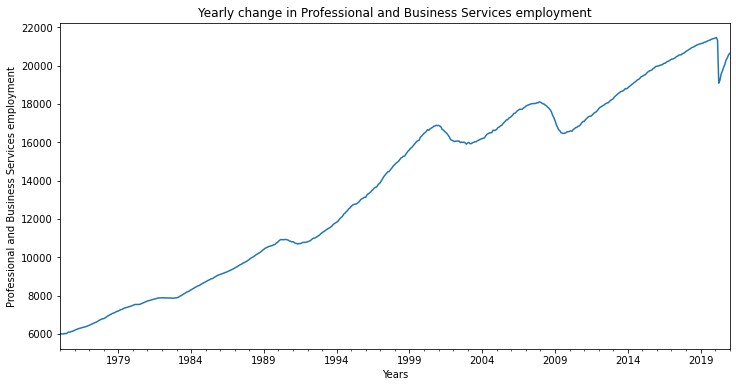

In [31]:
#Yearly change in Professional and Business Services employment
fig = plt.figure(figsize=(12, 6))
df['target_prof_business'].plot()
plt.xlim(['1975', '2021'])
plt.xlabel('Years')
plt.ylabel('Professional and Business Services employment')
plt.title('Yearly change in Professional and Business Services employment')
plt.show;

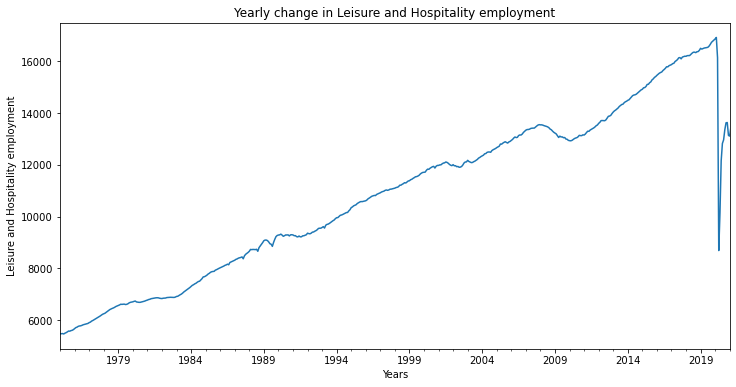

In [32]:
#Yearly change in Leisure and Hospitality employment
fig = plt.figure(figsize=(12, 6))
df['target_leisure_hospitality'].plot()
plt.xlim(['1975', '2021'])
plt.xlabel('Years')
plt.ylabel('Leisure and Hospitality employment')
plt.title('Yearly change in Leisure and Hospitality employment')
plt.show;

Biggest drop in Leisure and Hospitality employment in 2020. Around 50% drop in 2020. It is coming up in 2021. Unemployment rate is not as good as before 2020.

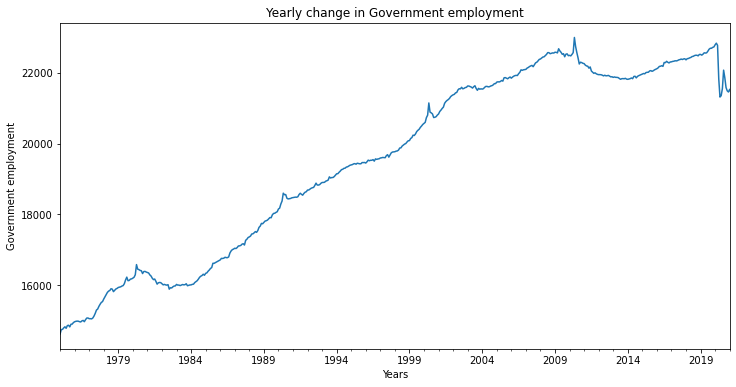

In [33]:
#Yearly change in Government employment
fig = plt.figure(figsize=(12, 6))
df['target_gov'].plot()
plt.xlim(['1975', '2021'])
plt.xlabel('Years')
plt.ylabel('Government employment')
plt.title('Yearly change in Government employment')
plt.show;

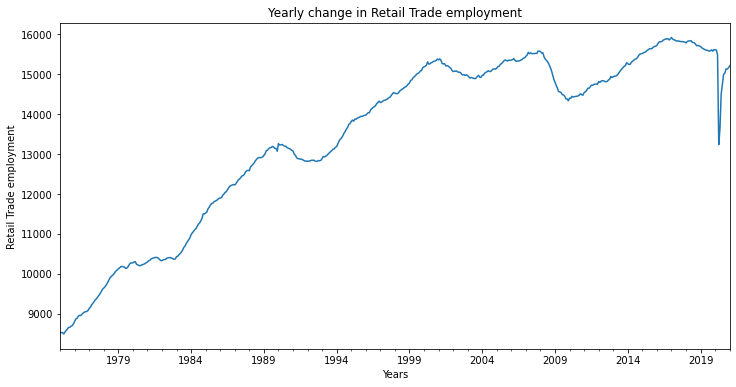

In [34]:
#Yearly change in Retail Trade employment
fig = plt.figure(figsize=(12, 6))
df['target_retail'].plot()
plt.xlim(['1975', '2021'])
plt.xlabel('Years')
plt.ylabel('Retail Trade employment')
plt.title('Yearly change in Retail Trade employment')
plt.show;